<a href="https://colab.research.google.com/github/Maruf-MLE/Machine_learning/blob/main/Cat%20or%20dog%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pushpakhinglaspure/cats-vs-dogs")

print("Path to dataset files:", path)

Resuming download from 390070272 bytes (182879752 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/pushpakhinglaspure/cats-vs-dogs?dataset_version_number=3 (390070272/572950024) bytes left.


100%|██████████| 546M/546M [00:07<00:00, 23.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pushpakhinglaspure/cats-vs-dogs/versions/3


In [7]:
import tensorflow as tf

In [26]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
#genarator

train_ds=keras.utils.image_dataset_from_directory(
  directory =  '/root/.cache/kagglehub/datasets/pushpakhinglaspure/cats-vs-dogs/versions/3/dogs_vs_cats/dogs_vs_cats/train',
  labels = 'inferred',
  label_mode = 'int',
  batch_size = 32,
  image_size= (256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
  directory =  '/root/.cache/kagglehub/datasets/pushpakhinglaspure/cats-vs-dogs/versions/3/dogs_vs_cats/dogs_vs_cats/test',
  labels = 'inferred',
  label_mode = 'int',
  batch_size = 32,
  image_size= (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds= validation_ds.map(process)

In [27]:
# Create CNN model
model= Sequential()
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2,),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2,),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2,),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2,),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2,),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 125, 125, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 60, 60, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,921 (1.67 MB)

 Trainable params: 437,089 (1.67 MB)

 Non-trainable params: 832 (3.25 KB)

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 242ms/step - accuracy: 0.6296 - loss: 0.6563 - val_accuracy: 0.5986 - val_loss: 0.8409
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 239ms/step - accuracy: 0.7501 - loss: 0.5082 - val_accuracy: 0.7432 - val_loss: 0.5631
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.8124 - loss: 0.4112 - val_accuracy: 0.7996 - val_loss: 0.4370
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 238ms/step - accuracy: 0.8521 - loss: 0.3314 - val_accuracy: 0.8398 - val_loss: 0.3636
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 239ms/step - accuracy: 0.8918 - loss: 0.2503 - val_accuracy: 0.8524 - val_loss: 0.3544
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 238ms/step - accuracy: 0.9231 - loss: 0.1893 - val_accuracy: 0.8672 - val_loss: 0.3175
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.9400 - loss: 0.1486 - val_accuracy: 0.5992 - val_loss: 1.3437
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.9566 -

In [33]:
import cv2
t_image=cv2.imread('/content/images (1).webp')

array([[[232, 228, 227],
        [232, 228, 227],
        [232, 228, 227],
        ...,
        [237, 218, 207],
        [237, 218, 207],
        [237, 218, 207]],

       [[232, 228, 227],
        [232, 228, 227],
        [232, 228, 227],
        ...,
        [237, 218, 207],
        [237, 218, 207],
        [237, 218, 207]],

       [[232, 228, 227],
        [232, 228, 227],
        [232, 228, 227],
        ...,
        [237, 218, 207],
        [237, 218, 207],
        [237, 218, 207]],

       ...,

       [[139, 140, 144],
        [146, 147, 151],
        [148, 149, 153],
        ...,
        [120, 122, 124],
        [120, 122, 124],
        [120, 122, 124]],

       [[140, 140, 147],
        [146, 146, 153],
        [147, 147, 154],
        ...,
        [110, 111, 113],
        [110, 111, 113],
        [110, 111, 113]],

       [[135, 135, 144],
        [135, 135, 144],
        [135, 135, 144],
        ...,
        [119, 121, 123],
        [119, 121, 123],
        [119, 121, 123]]], dtype=uint8)
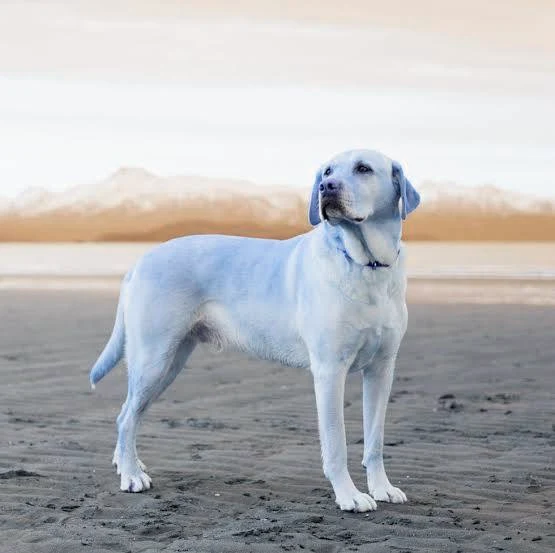

In [34]:
t_image

In [36]:
t_image=cv2.resize(t_image,(255,255))

In [37]:
test_input= t_image.reshape(1,255,255,3)

In [38]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)